# Project Overview:
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the 
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to 
see how that impacted the stock prices of the company and whether Time series models or any 
other predictive models can do justice to such situations. This dataset has monthly stock prices 
of the bank since its inception and includes closing, starting, highest, and lowest stock prices of 
every month. The main objective is to predict the stock’s closing price of the month. 

### Import Libraries

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [5]:
df = pd.read_csv("data_YesBank_StockPrices.csv")
df.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


### Data Cleaning

In [7]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [8]:
df.shape

(185, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [10]:
df["Date"] = pd.to_datetime(df["Date"],format="%b-%y")
df["Date"] = df["Date"].dt.strftime('%b-%y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [12]:
df.head(15)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [13]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA) 

1) Univariate Analysis:
        Analyzing one variable at a time 

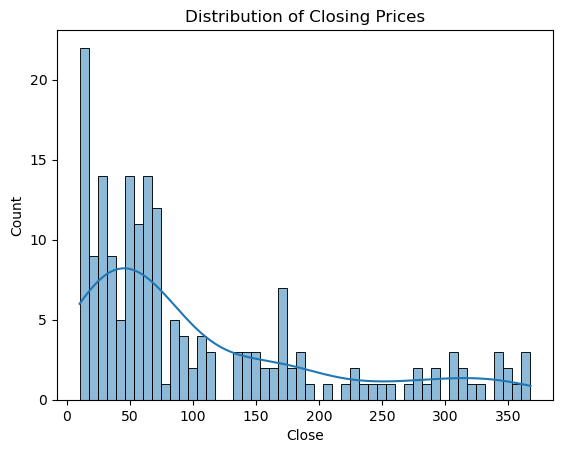

In [16]:
sns.histplot(df['Close'],bins=50,kde=True)
plt.title("Distribution of Closing Prices")
plt.show()

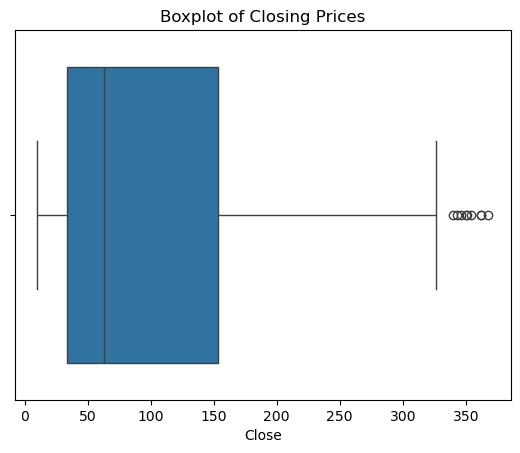

In [17]:
sns.boxplot(x=df["Close"])
plt.title("Boxplot of Closing Prices")
plt.show()

In [18]:
df.set_index('Date', inplace = True)

<Axes: xlabel='Date'>

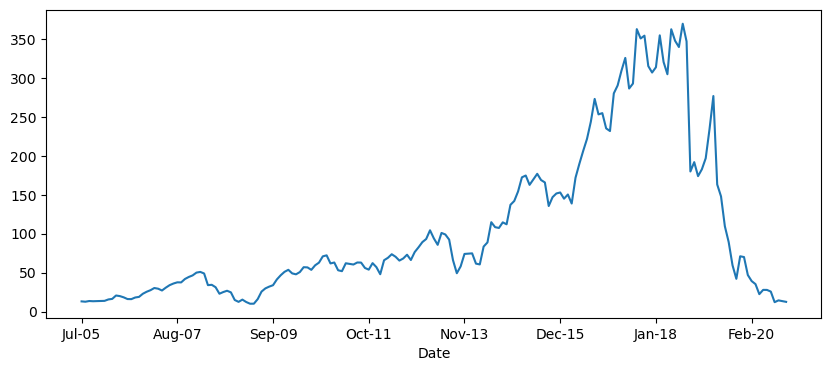

In [19]:
df["Open"].plot(figsize=(10,4))

<Axes: xlabel='Date'>

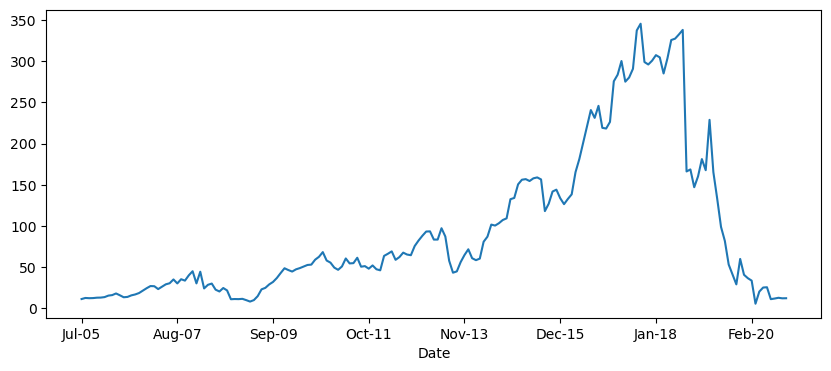

In [20]:
df["Low"].plot(figsize=(10,4))

<Axes: xlabel='Date'>

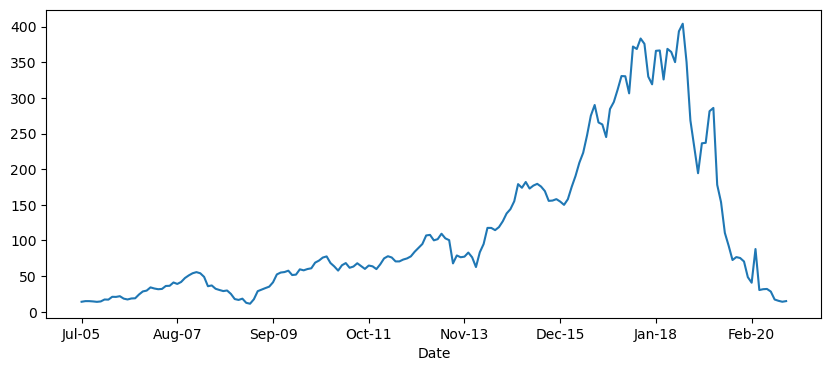

In [21]:
df["High"].plot(figsize=(10,4))

<Axes: xlabel='Date'>

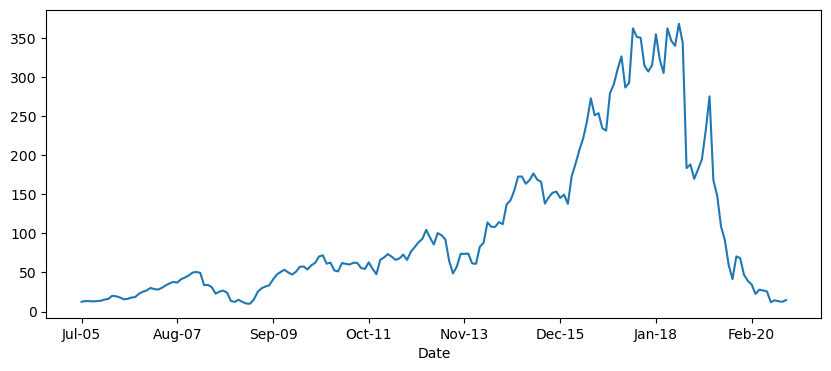

In [22]:
df["Close"].plot(figsize=(10,4))

In [23]:
df.reset_index(inplace=True)

In [24]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


2) Bivariate Analysis: Analysing 2 variables at a time

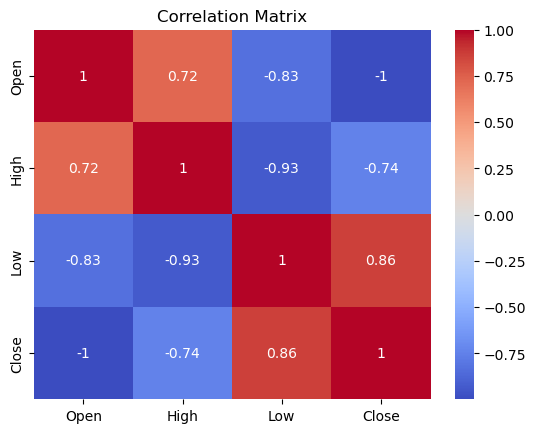

In [26]:
l1 = df[["Open","High","Low","Close"]].corr()
sns.heatmap(l1.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

3) Multivariate Analysis: Uncover Interactions among three or more variables

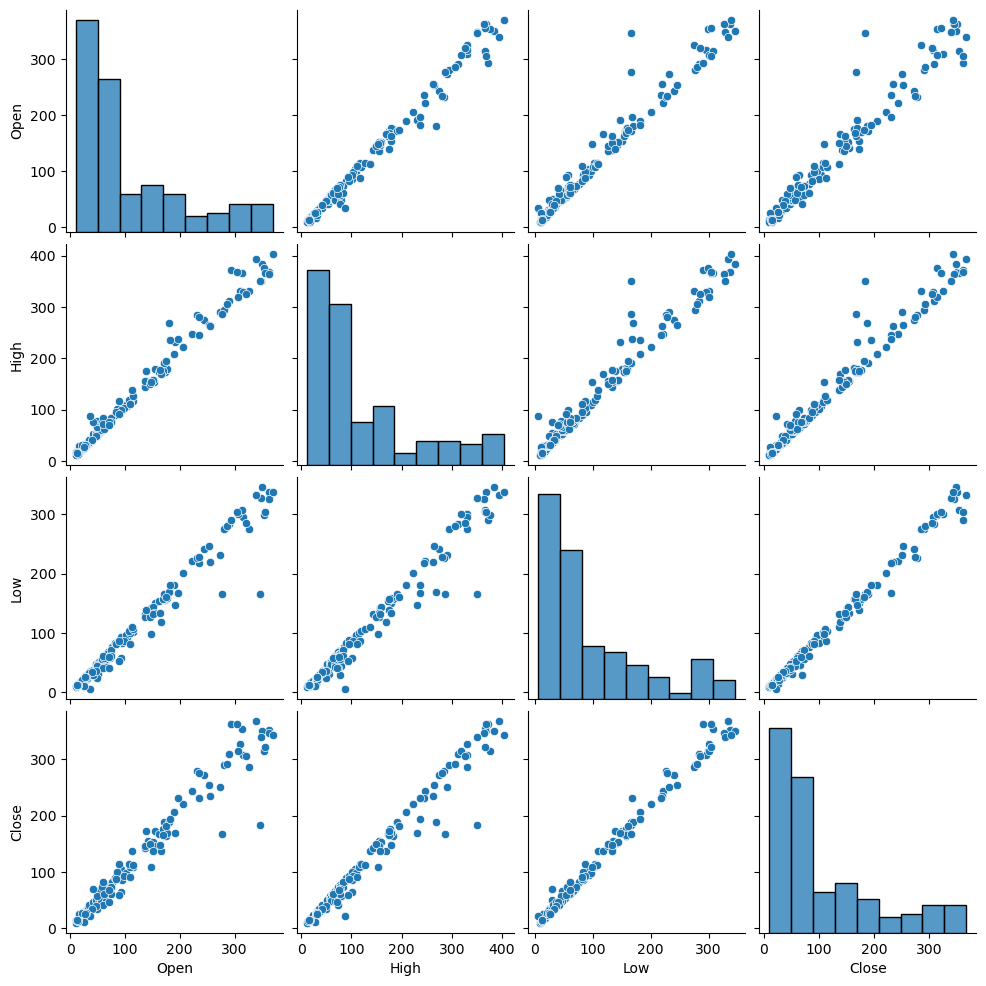

In [28]:
sns.pairplot(df[["Open","High","Low","Close"]])
plt.show()

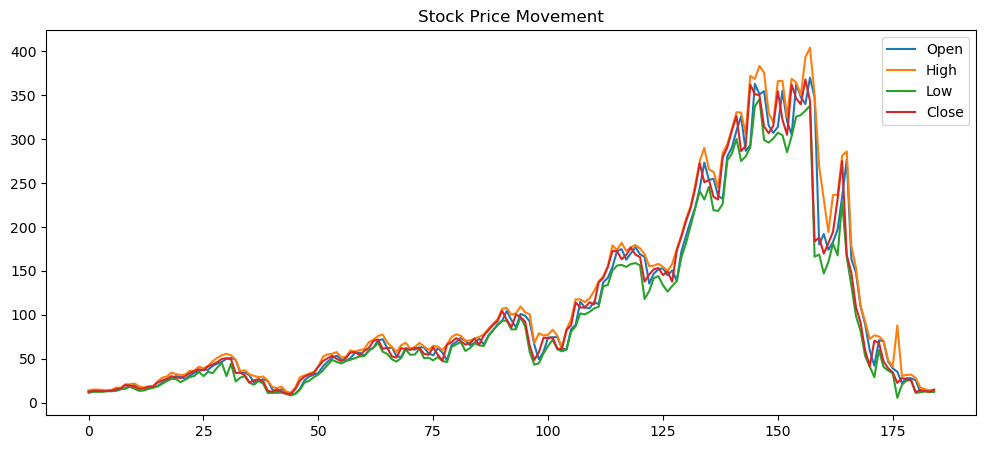

In [29]:
df[["Open","High","Low","Close"]].plot(figsize=(12,5))
plt.title("Stock Price Movement")
plt.show()

In [30]:
correlation = df[["Open","High","Low","Close"]].corr()
correlation

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


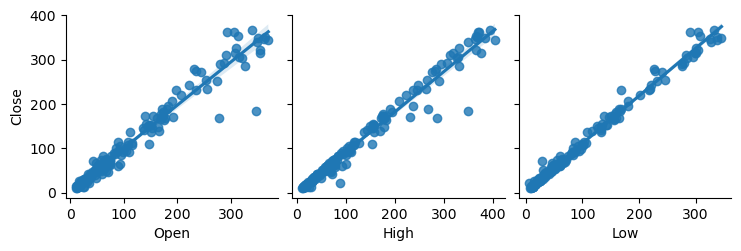

In [31]:
sns.pairplot(df,x_vars=["Open","High","Low"],y_vars="Close",kind='reg')

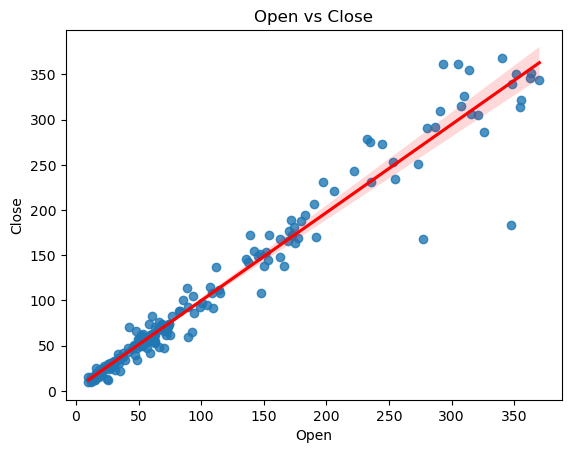

In [32]:
sns.regplot(x="Open",y="Close",data=df,line_kws={'color':'red'})
plt.title("Open vs Close")
plt.show()

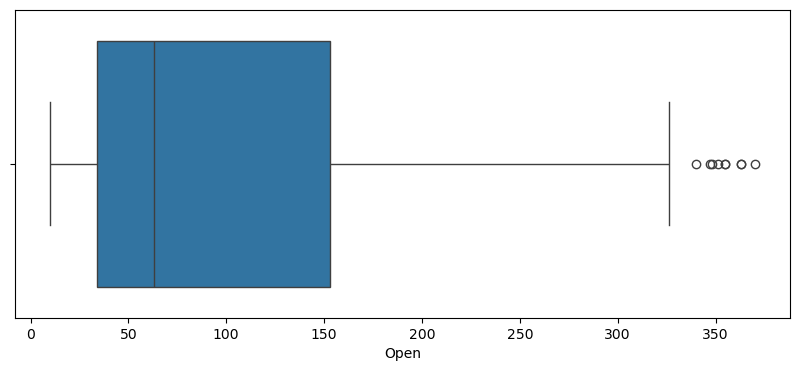

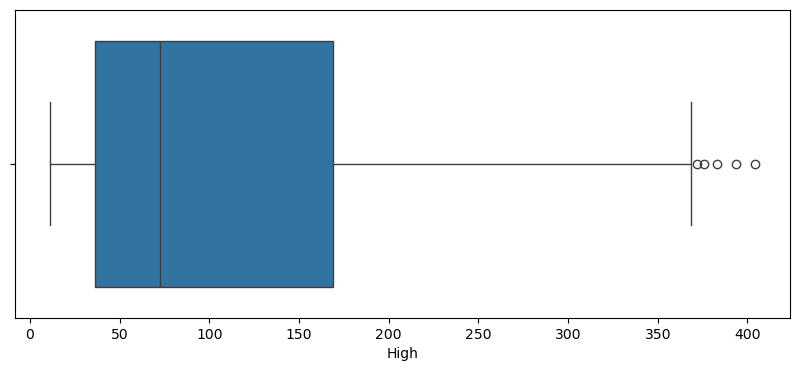

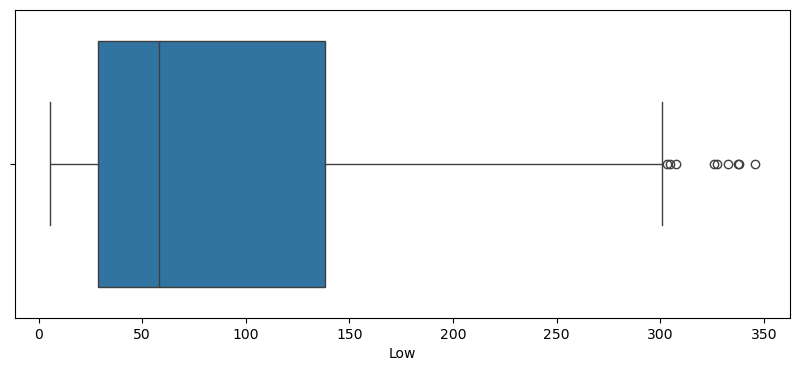

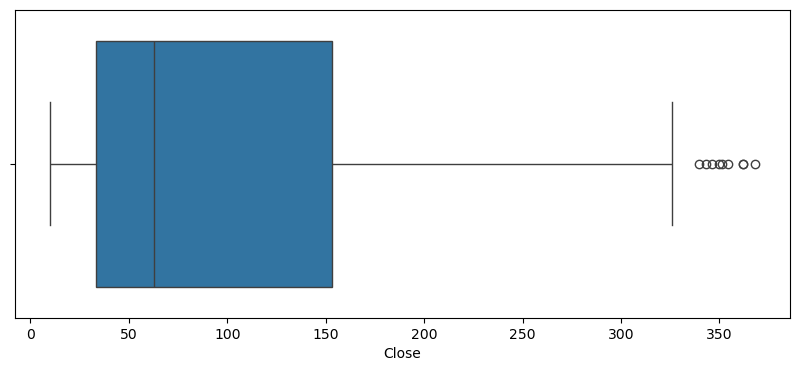

In [33]:
col = df[["Open", "High", "Low","Close"]]
for i in col:
    plt.figure(figsize = (10,4))
    sns.boxplot(x = col[i])
    plt.show()

## Model Prep

In [35]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [36]:
X = df.iloc[:,1:4]
X.head()

,Open,High,Low
0,13.00,14.00,11.25
1,12.58,14.88,12.55
2,13.48,14.87,12.27
3,13.20,14.47,12.40
4,13.35,13.88,12.88


In [37]:
y = df.iloc[:,-1]
y.head()

0    12.46
1    13.42
2    13.30
3    12.99
4    13.41
Name: Close, dtype: float64

In [38]:
dates = df["Date"]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

## Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Predicting the Result

In [46]:
y_pred = lr.predict(X_test)
y_pred

array([ 15.19794692,  35.60440297,  15.39893614, 345.84595034,
       165.78666277,  71.38973919,  93.60427645, 107.96033787,
       166.25255981, 261.05681555, 322.66745395,  36.99115039,
        26.46456956,  68.02985843, 126.89138635,  14.91580589,
       368.04417906,  45.09150633, 166.94595911,  59.50645398,
        47.95041058, 108.58226736, 352.47864613, 316.86599124,
        14.89607725,  38.15274855, 147.34470927,  75.03712355,
        56.16084651, 175.09444029, 339.09119017,  40.29402299,
        90.82653293,  34.13570399,  15.15576377,  30.8515012 ,
        62.81462017, 304.04036132, 146.15589898, 241.84344982,
       264.82220747, 321.24861753,  48.91202283,  39.965772  ,
       249.92656032,  95.45548138,  49.60062376,  52.02215784,
        11.78341028, 198.00497064,  27.48701381, 232.55476671,
        48.69070774,  45.05236027,  32.55564442,  18.80825151])

In [47]:
y_train

91      94.50
125    145.23
124    153.30
135    253.52
169     59.50
        ...  
16      25.32
88      88.48
39      13.58
59      53.83
158    183.45
Name: Close, Length: 129, dtype: float64

### Checking the Accuracy

In [49]:
print("Trainig Score: ",(lr.score(X_train, y_train))*100,"%")
print("Testing Score: ",(lr.score(X_test, y_test))*100,"%")

Trainig Score:  99.41185323459202 %
Testing Score:  99.62195734534407 %


### Visualise the Predicted and Actual 

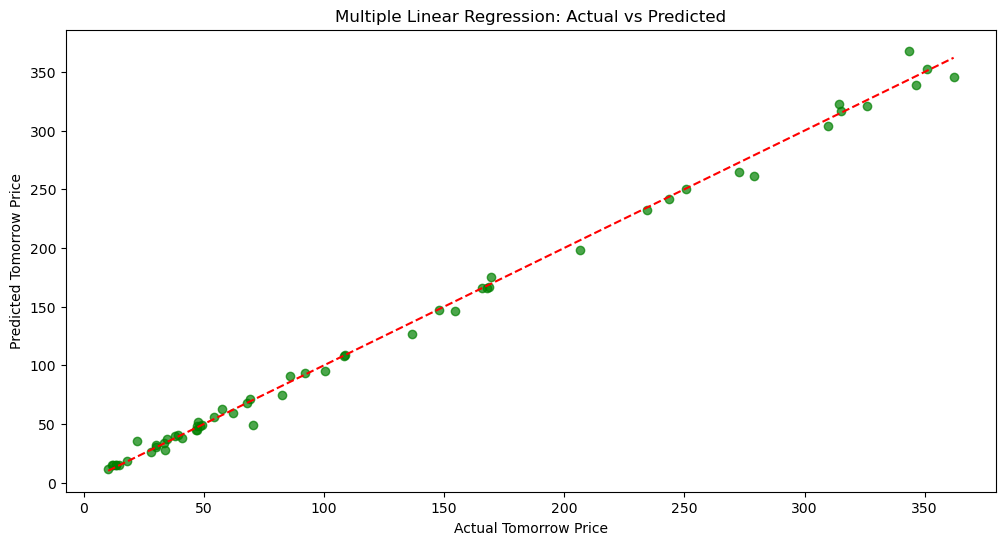

In [51]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Tomorrow Price')
plt.ylabel('Predicted Tomorrow Price')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()

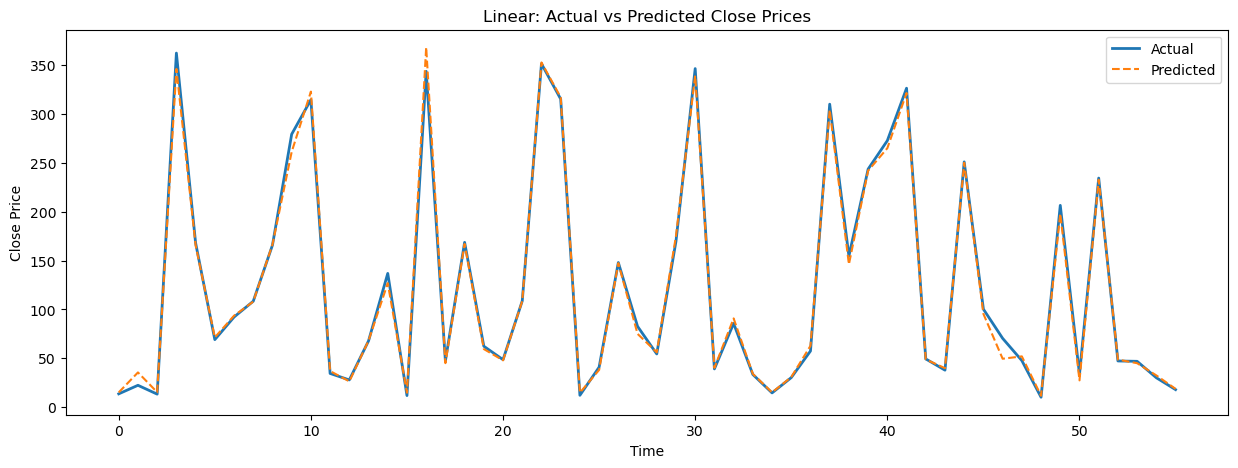

In [52]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Linear: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [53]:
result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
result.sample(10)

,Actual,Predicted,Difference
18,30.16,32.555644,-2.395644
175,34.55,36.991150,-2.441150
130,206.39,198.004971,8.385029
98,57.50,62.814620,-5.314620
176,22.45,35.604403,-13.154403
177,27.95,26.464570,1.485430
42,12.24,14.896077,-2.656077
160,169.65,175.094440,-5.444440
1,13.42,15.398936,-1.978936
133,272.56,264.822207,7.737793


### Evaluation Metrics

In [55]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9962195734534407

MAE is:  4.387392379784989

MSE is:  46.53408473864943

RMSE is:  6.821589604971075


# Decision Tree Regressor

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [59]:
y_pred = dtree.predict(X_test)
y_pred

array([168.6 , 168.6 , 315.05,  47.32,  53.41, 322.25,  59.5 ,  24.13,
        41.45,  13.71, 149.38,  50.57,  53.83,  12.42, 165.74,  16.16,
        43.48,  33.45, 272.56, 350.  , 346.2 ,  67.83, 100.28,  53.41,
       100.28,  30.31,  53.41,  13.42, 350.  , 100.28, 100.28,  53.41,
       315.05,  28.63,  13.71, 165.74, 188.05,  26.97,  18.46, 100.28,
       322.25, 100.28,  40.99,  65.99,  67.83,  41.45, 145.92,  57.5 ,
        74.02, 188.05,  16.16, 279.1 ,  18.46,  28.14, 292.37,  52.59])

### Checking The Accuracy

In [61]:
print("Trainig Score: ",(dtree.score(X_train, y_train))*100,"%")
print("Testing Score: ",(dtree.score(X_test, y_test))*100,"%")

Trainig Score:  100.0 %
Testing Score:  98.70712428952935 %


### Visualisation

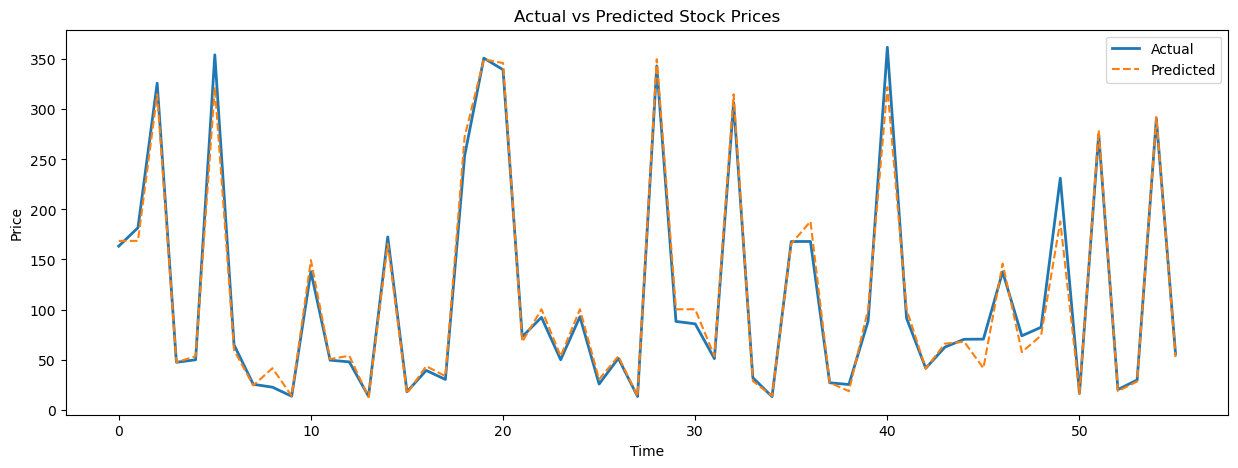

In [63]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

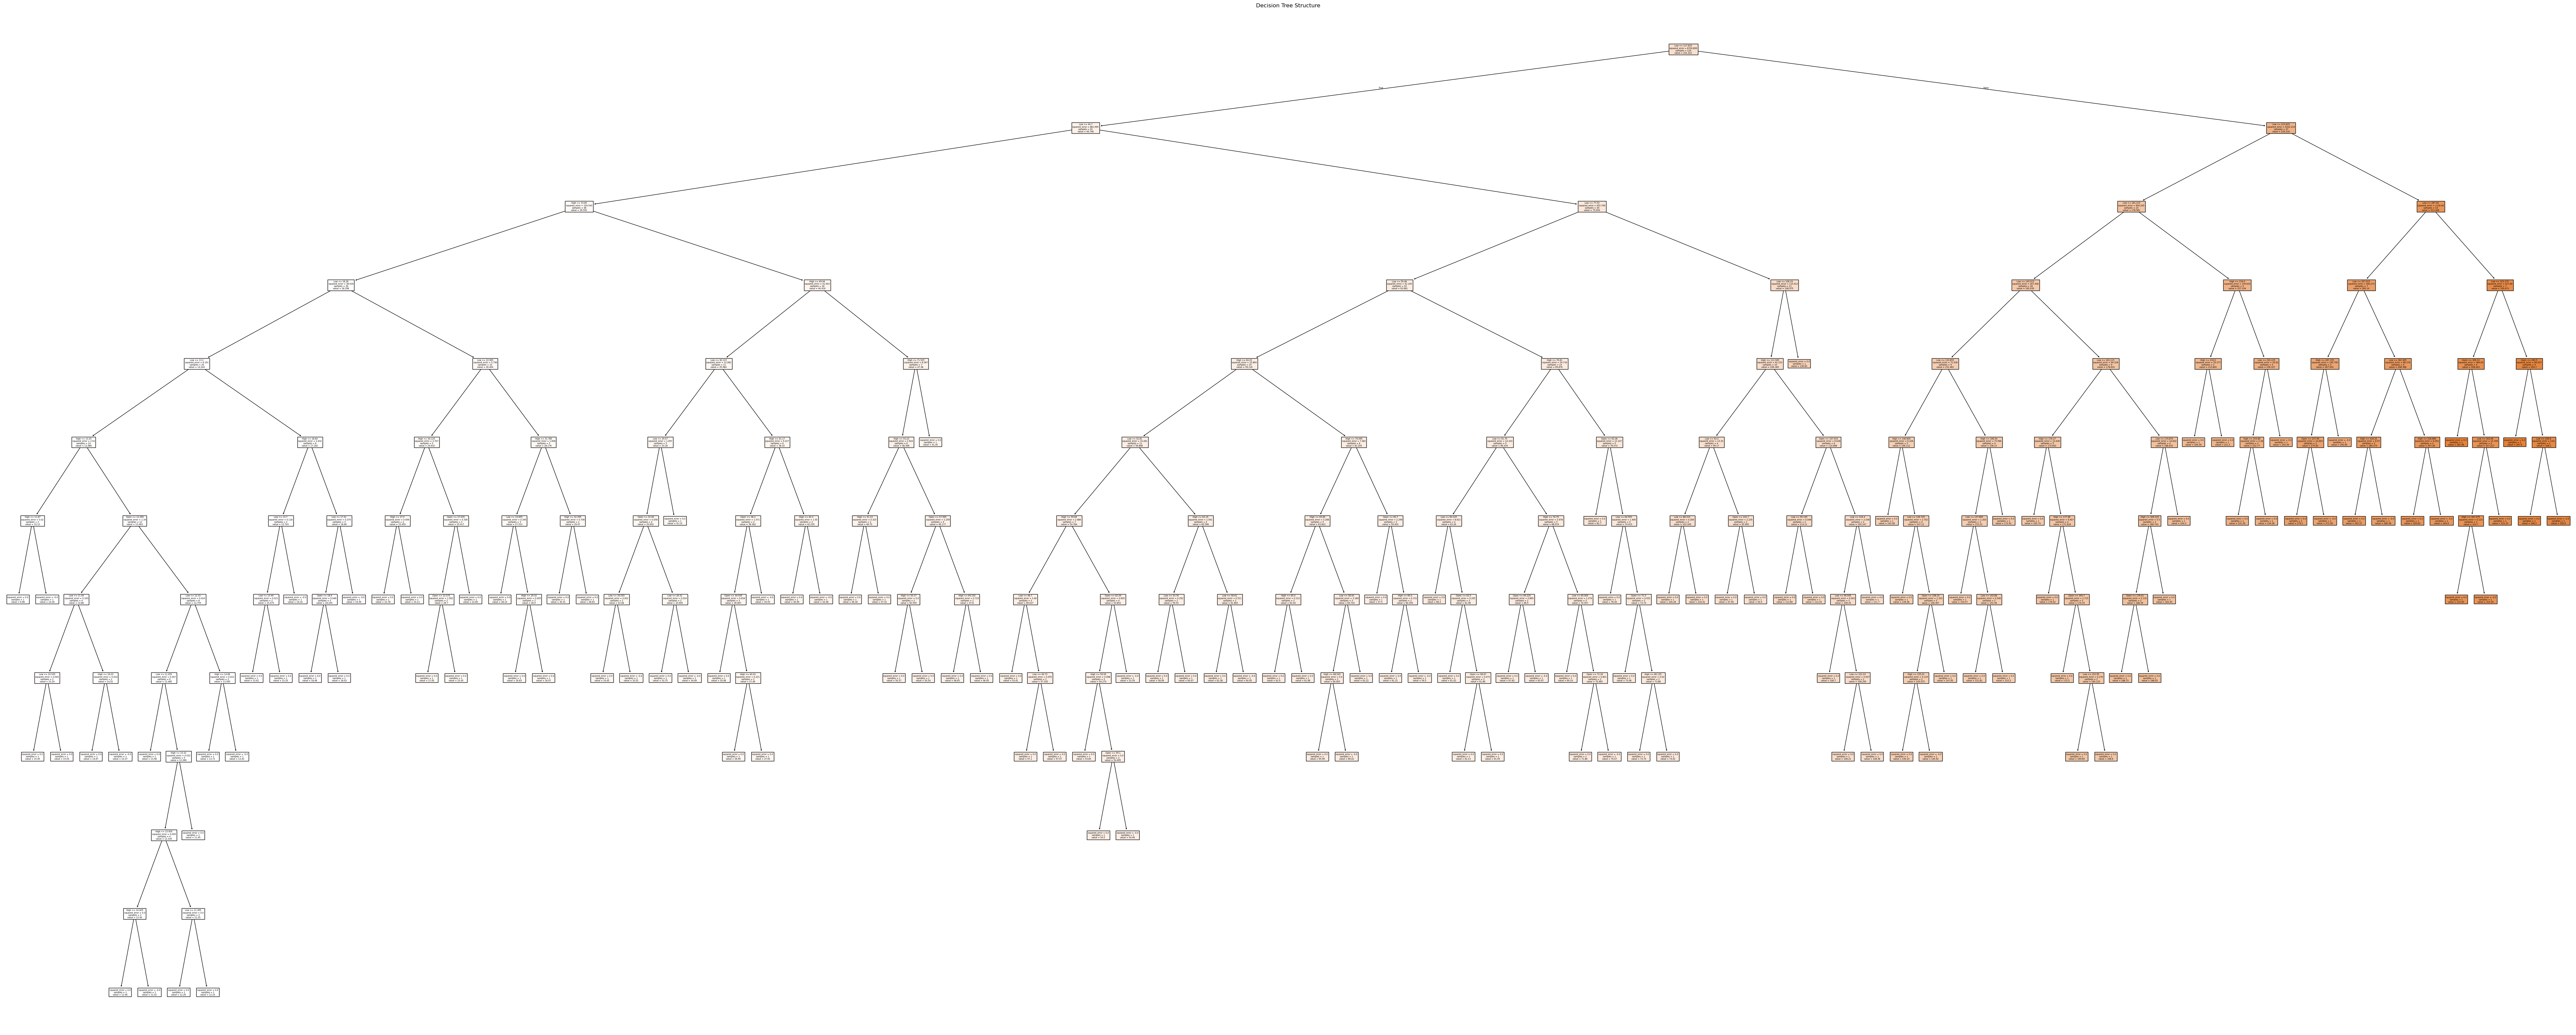

In [64]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100,40))
plot_tree(dtree, filled=True, feature_names=X.columns)
plt.title('Decision Tree Structure')
plt.savefig('dtree_plot.png', format='png')
plt.show()

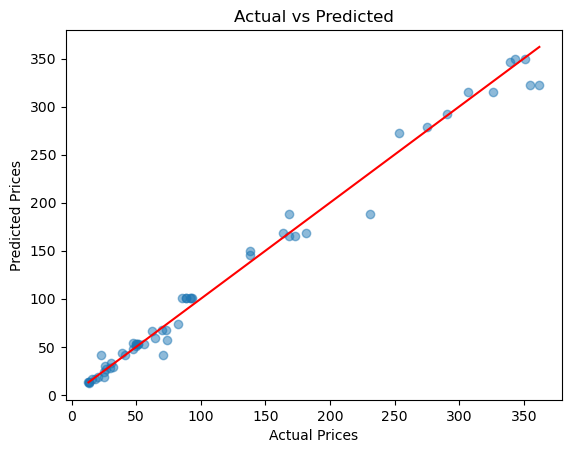

In [65]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

In [66]:
dtree_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
dtree_result.sample(10)

,Actual,Predicted,Difference
145,351.15,350.00,1.15
148,306.80,315.05,-8.25
171,70.45,41.45,29.00
29,49.81,53.41,-3.60
116,163.31,168.60,-5.29
7,16.12,16.16,-0.04
115,172.55,165.74,6.81
176,22.45,41.45,-19.00
164,275.05,279.10,-4.05
178,26.85,26.97,-0.12


### Evaluaton Metrics

In [68]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9870712428952935

MAE is:  7.959285714285713

MSE is:  151.88825714285713

RMSE is:  12.324295401476594


# Random Forest Regressor

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [71]:
from sklearn.ensemble import RandomForestRegressor
ran_forest = RandomForestRegressor(n_estimators=10,random_state =0)
ran_forest.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [72]:
y_pred = ran_forest.predict(X_test)
y_pred

array([ 26.292, 350.045, 237.769,  40.299, 165.609, 171.58 ,  58.253,
       339.888,  19.732,  67.385,  57.916,  11.986,  50.874, 105.937,
       201.554, 165.426,  29.147,  56.404,  38.246, 172.971,  49.721,
        46.18 ,  14.581, 325.025, 111.933, 170.819,  59.562,  47.313,
        13.254, 309.057,  25.199, 181.905, 313.512, 306.717, 213.94 ,
        13.513,  62.879,  68.615,  13.269,  91.008,  14.205,  29.424,
        61.923, 186.188,  71.364,  67.543,  73.835,  33.565,  62.478,
        97.136, 330.807,  26.709, 295.86 , 355.31 ,  47.416,  12.38 ])

### Checking the Accuracy

In [74]:
print("Trainig Score: ",(ran_forest.score(X_train, y_train))*100,"%")
print("Testing Score: ",(ran_forest.score(X_test, y_test))*100,"%")

Trainig Score:  99.79551017721546 %
Testing Score:  99.79482744254278 %


### Visualization

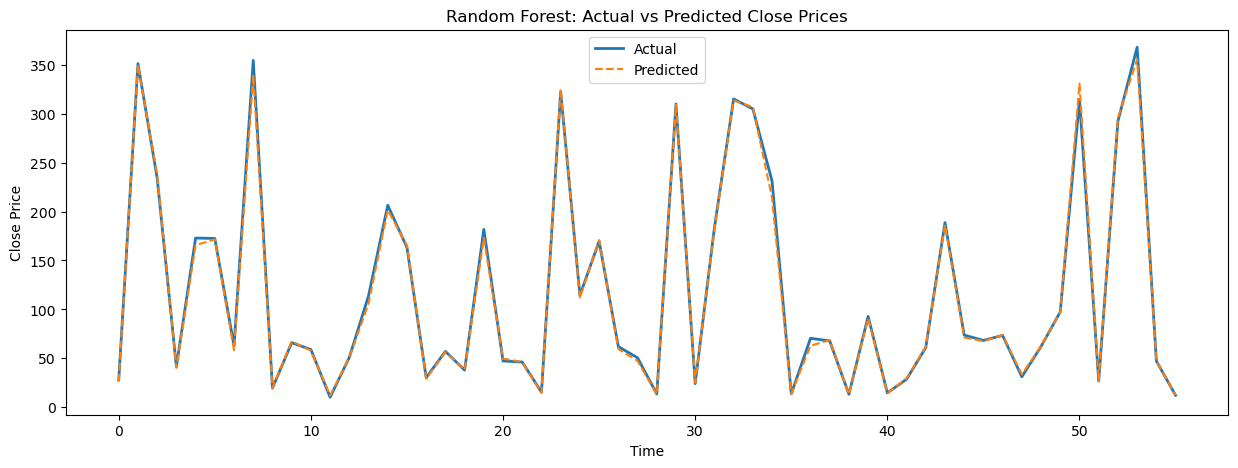

In [76]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Random Forest: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

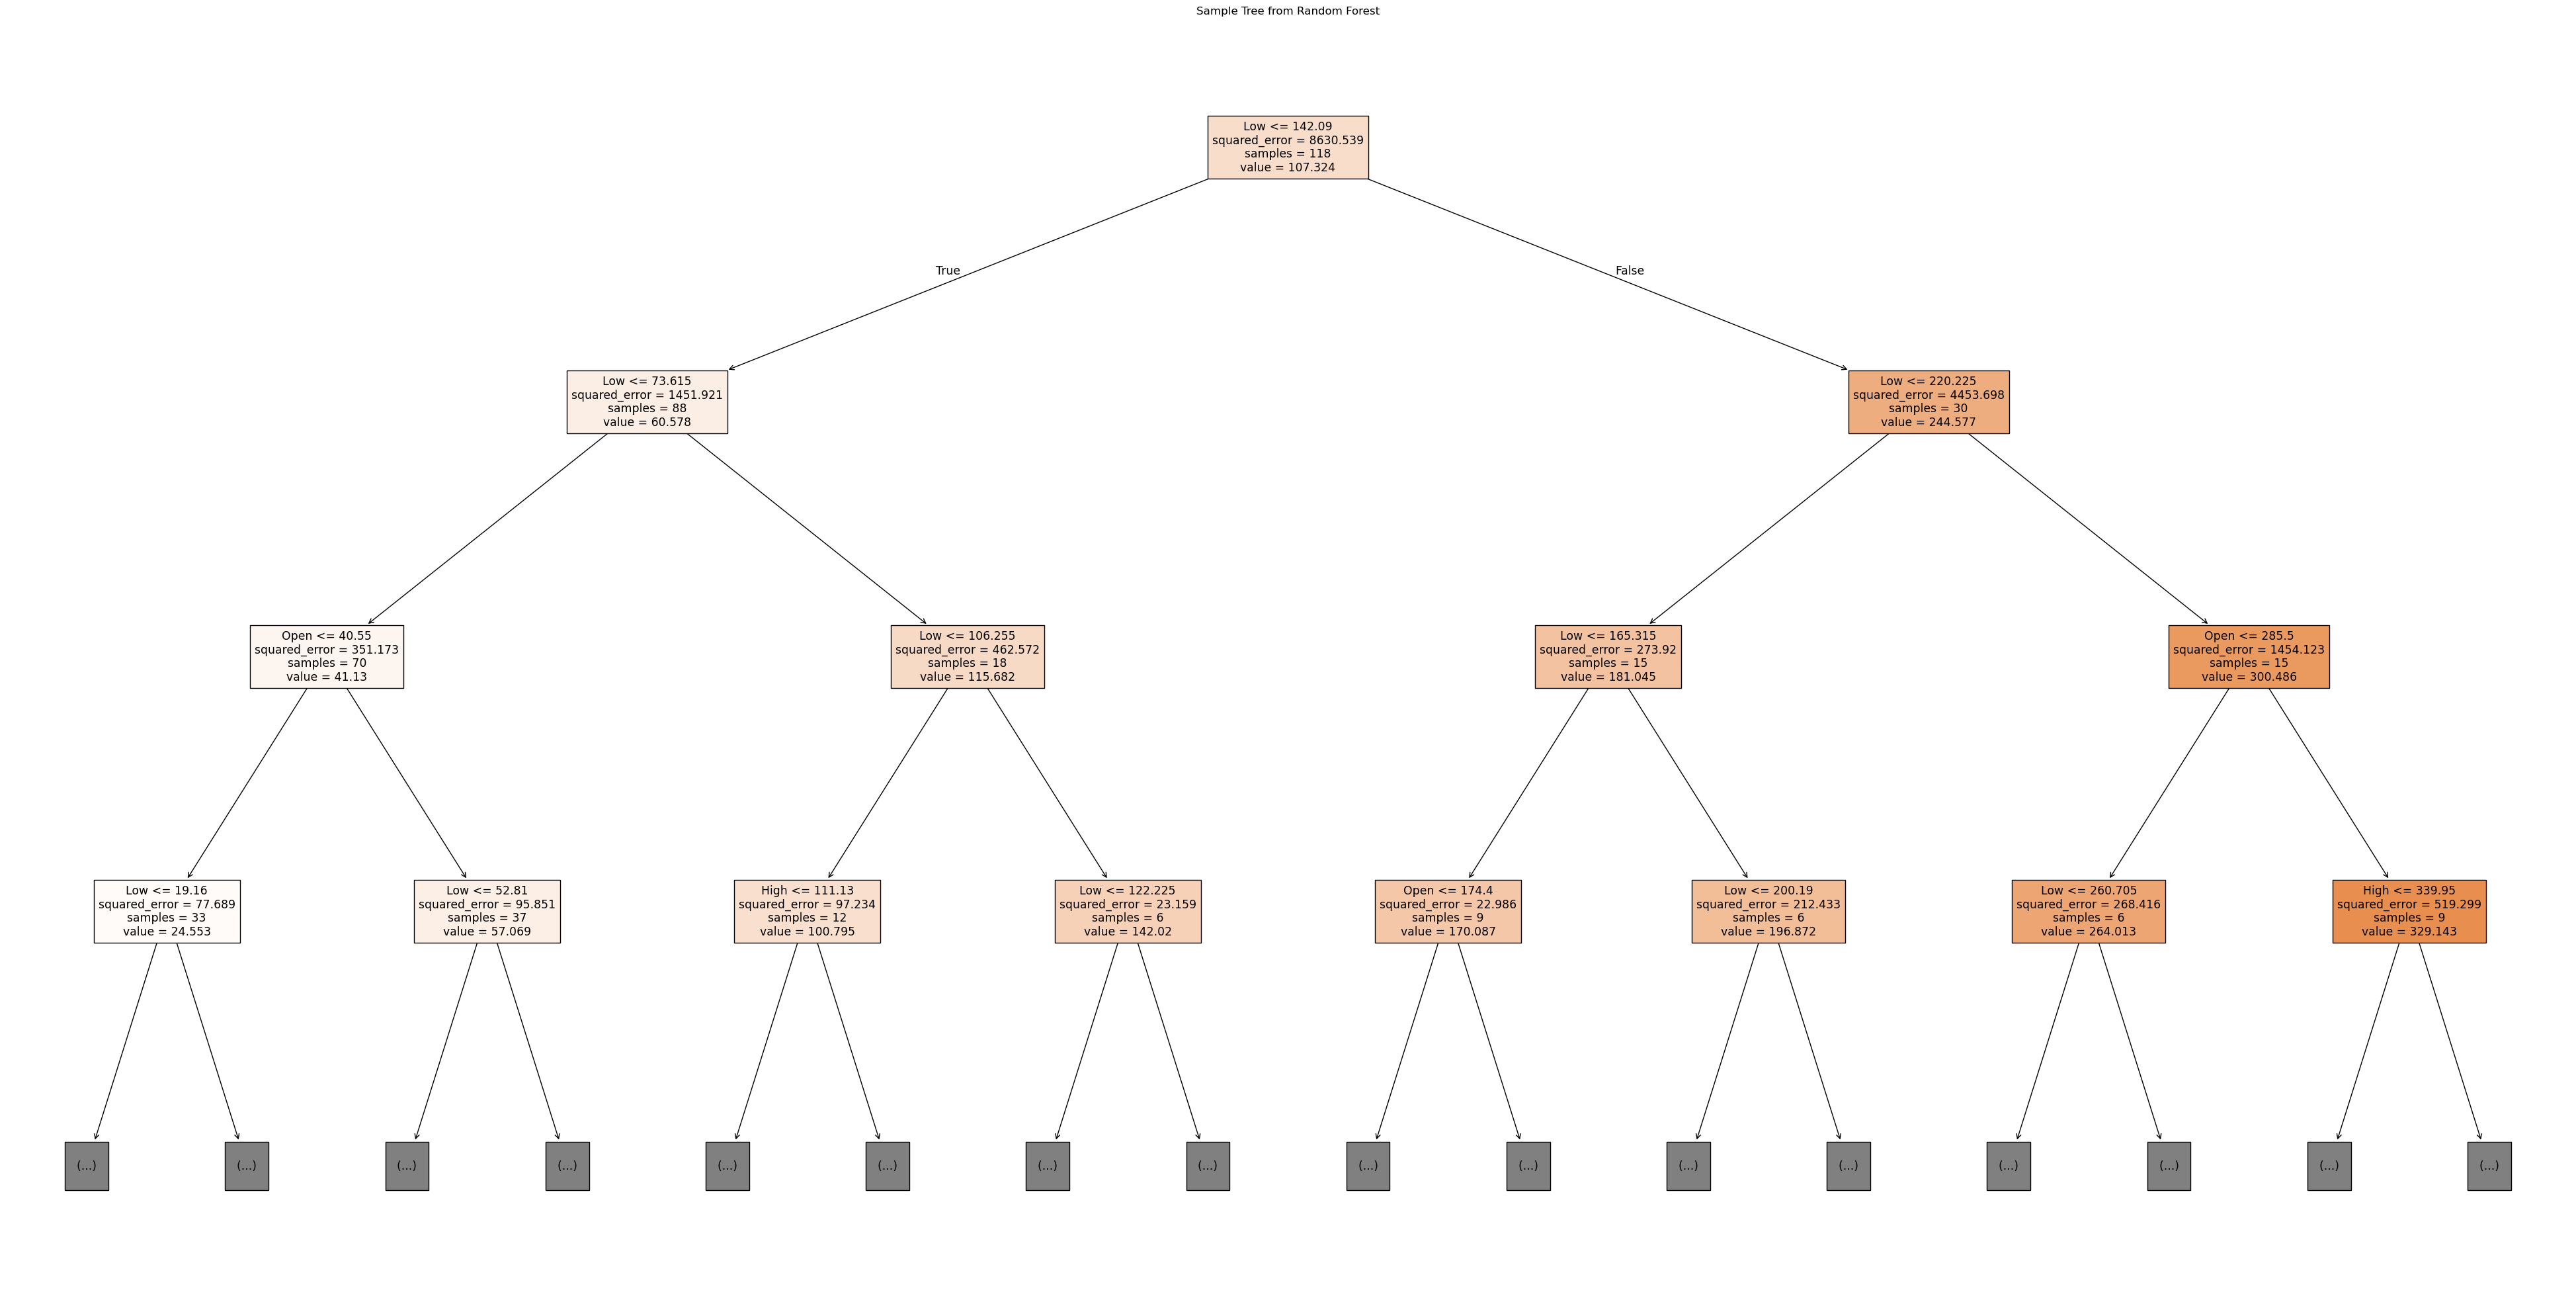

In [77]:
from sklearn.tree import plot_tree

# visualize the first tree
plt.figure(figsize=(50,25))
plot_tree(ran_forest.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)
plt.title("Sample Tree from Random Forest")
plt.show()

In [78]:
rforest_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
rforest_result.sample(10)

,Actual,Predicted,Difference
156,367.90,355.310,12.590
19,28.63,29.424,-0.794
143,292.37,295.860,-3.490
42,12.24,12.380,-0.140
56,50.97,50.874,0.096
34,31.13,33.565,-2.435
160,169.65,170.819,-1.169
184,14.67,14.205,0.465
140,309.82,309.057,0.763
136,234.28,237.769,-3.489


In [79]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9979482744254279

MAE is:  2.8467499999999952

MSE is:  24.115637749999955

RMSE is:  4.9107675316593795


# Support Vector Machine

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)

In [82]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [83]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

In [84]:
svr_model.fit(X_train, y_train)

SVR(C=100)

In [85]:
y_pred = svr_model.predict(X_test)

In [86]:
print("Trainig Score: ",(svr_model.score(X_train, y_train))*100,"%")
print("Testing Score: ",(svr_model.score(X_test, y_test))*100,"%")

Trainig Score:  99.47614285016539 %
Testing Score:  96.48412660068186 %


### Visualization

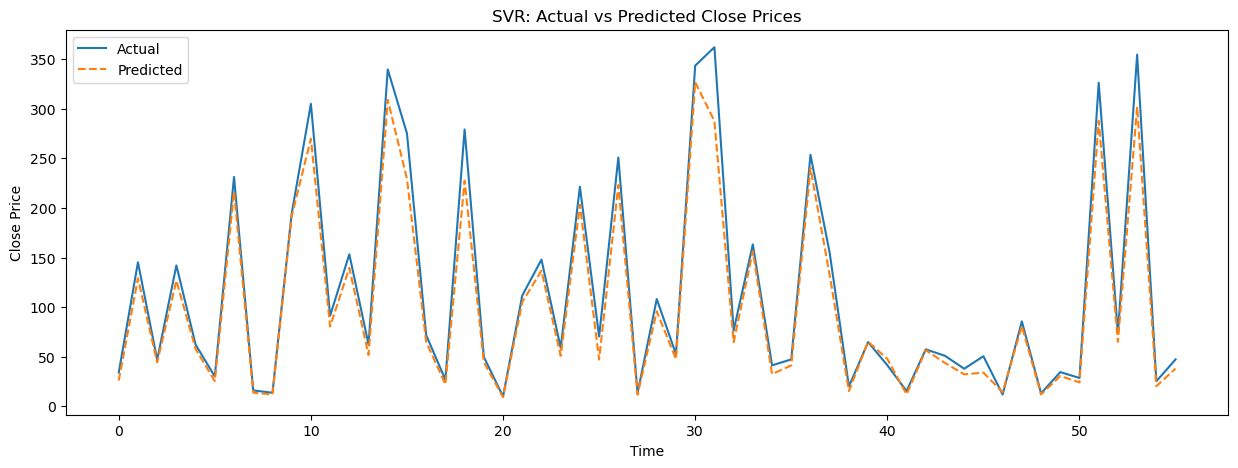

In [88]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('SVR: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

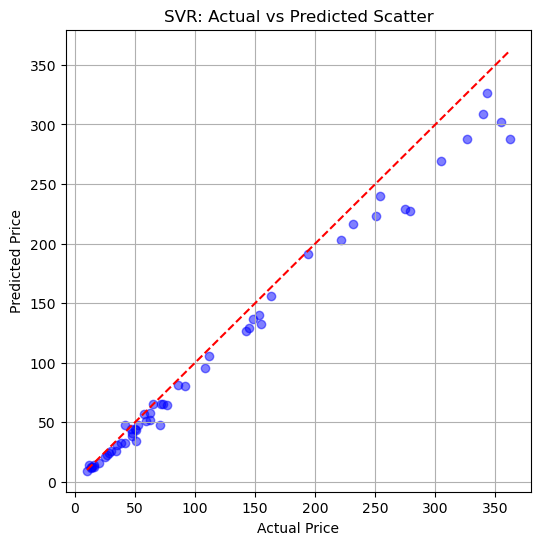

In [89]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.title('SVR: Actual vs Predicted Scatter')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

In [90]:
SVM_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
SVM_result.sample(5)

,Actual,Predicted,Difference
4,13.41,11.805129,1.604871
45,15.45,12.149039,3.300961
155,339.60,308.880270,30.719730
98,57.50,56.684922,0.815078
173,46.95,44.379243,2.570757


### Evaluation Metrics

In [92]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9648412660068186

MAE is:  13.159787877133892

MSE is:  392.86939706698973

RMSE is:  19.820933304640064


# K Nearest Neighbor 

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)

In [95]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [96]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [97]:
y_pred = knn_model.predict(X_test)

### Checking the Accuracy

In [99]:
print("Trainig Score: ",(knn_model.score(X_train, y_train))*100,"%")
print("Testing Score: ",(knn_model.score(X_test, y_test))*100,"%")

Trainig Score:  98.61763309917811 %
Testing Score:  97.25404521886408 %


### Visualization

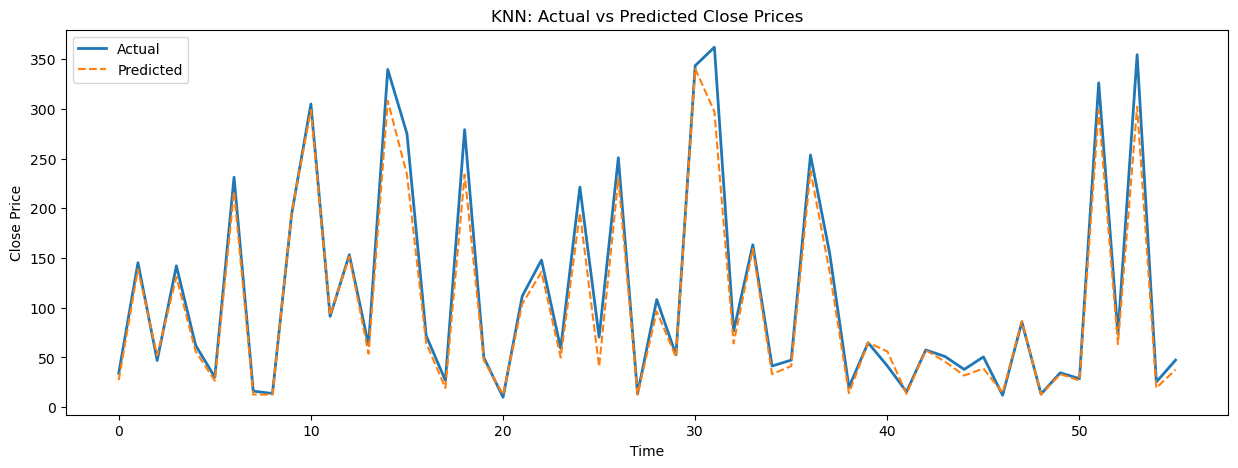

In [101]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('KNN: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

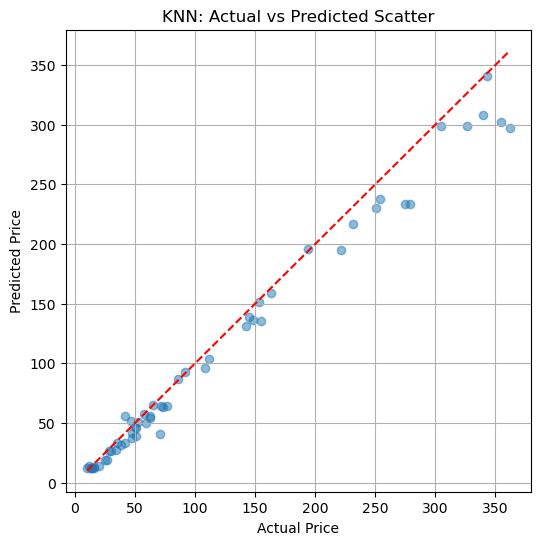

In [102]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN: Actual vs Predicted Scatter')
plt.grid(True)
plt.show()

In [103]:
KNN_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
KNN_result.sample(5)

,Actual,Predicted,Difference
166,147.95,135.914,12.036
33,34.06,27.154,6.906
7,16.12,12.646,3.474
4,13.41,12.646,0.764
56,50.97,45.848,5.122


### Evaluation Metrics

In [105]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9725404521886408

MAE is:  11.197928571428571

MSE is:  306.8374417142857

RMSE is:  17.51677600799547


# Cross Validation for All Models

In [107]:
from sklearn.model_selection import cross_val_score

print("\nLinear Regression:")
print("Training cross validation score: ",round(((cross_val_score(lr, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(lr, X_test, y_test)).mean())*100,2))

print("\nDecision Tree Regressor: ")
print("Training cross validation score: ",round(((cross_val_score(dtree, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(dtree, X_test, y_test)).mean())*100,2))

print("\nRandom Forest Regressor: ")
print("Training cross validation score: ",round(((cross_val_score(ran_forest, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(ran_forest, X_test, y_test)).mean())*100,2))

print("\nSupport Vector Machine: ")
print("Training cross validation score: ",round(((cross_val_score(svr_model, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(svr_model, X_test, y_test)).mean())*100,2))

print("\nK Nearest Neighbor: ")
print("Training cross validation score: ",round(((cross_val_score(knn_model, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(knn_model, X_test, y_test)).mean())*100,2))


Linear Regression:
Training cross validation score:  99.24
Testing cross validation score:  99.16

Decision Tree Regressor: 
Training cross validation score:  98.15
Testing cross validation score:  97.0

Random Forest Regressor: 
Training cross validation score:  98.04
Testing cross validation score:  98.08

Support Vector Machine: 
Training cross validation score:  98.97
Testing cross validation score:  98.62

K Nearest Neighbor: 
Training cross validation score:  97.09
Testing cross validation score:  97.81


# Conclusion

In this project, we aimed to predict the monthly closing stock prices of Yes Bank using machine learning techniques. The dataset contained columns such as Open, High, Low, and Close prices, representing the monthly performance of the stock over time.

📊 Data Analysis Insights:
The closing price showed noticeable fluctuations, especially during crisis periods like the 2018 Rana Kapoor controversy.

The data was visually explored using histograms, boxplots, and line charts, revealing volatility, outliers, and general trends over time.

A correlation matrix and pairplots helped us understand that features like Open, High, and Low prices are strongly correlated with the Close price — making them good predictors.

🤖 Model Building & Evaluation:
We used Linear Regression, a simple and interpretable machine learning algorithm.

The model was trained on 70% of the data and tested on the remaining 30%.

StandardScaler was used to normalize the features, which improves model performance by keeping all features on the same scale.

The model successfully learned the relationship between the stock's open/high/low prices and its closing price.

Although the model can predict the closing price with a reasonable level of accuracy, it assumes a linear relationship, which might not fully capture complex stock price behaviors.